In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [19]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [20]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [21]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [22]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [23]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [24]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [25]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [26]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [27]:
#Menampikan tipe data tiap kolom
df.dtypes

id                  object
customer_id         object
order_date          object
sku_id              object
price                int64
qty_ordered          int64
before_discount    float64
discount_amount    float64
after_discount     float64
is_gross             int64
is_valid             int64
is_net               int64
payment_id           int64
payment_method      object
sku_name            object
base_price         float64
cogs                 int64
category            object
registered_date     object
dtype: object

In [28]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

id                 object
customer_id        object
order_date         object
sku_id             object
price               int64
qty_ordered         int64
before_discount     int32
discount_amount     int32
after_discount      int32
is_gross            int64
is_valid            int64
is_net              int64
payment_id          int64
payment_method     object
sku_name           object
base_price          int32
cogs                int64
category           object
registered_date    object
dtype: object

In [29]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int32
discount_amount             int32
after_discount              int32
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int32
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

**TOP 5 Produk dari Kategori Mobiles & Tablets selama tahun 2022**

In [30]:
# Memfilter data dengan nilai dari is_valid = 1, kategori = Mobiles & Tablets, dan data transaksi selama 2022
df_filtered = df[(df['is_valid'] == 1) & (df['category'] == 'Mobiles & Tablets') & (df['order_date'].dt.year == 2022)]

# Menjumlahkan kuantitas penjualan (valid = 1) yang paling tinggi
df_top_products = df_filtered.groupby('sku_name').agg({
    'qty_ordered': 'sum',
    'after_discount': 'sum'
}).sort_values(by='qty_ordered', ascending=False)

# Mengambil TOP 5 produk
top_5_products = df_top_products.head()

# Menampilkan hasil
print("TOP 5 Produk dari Kategori Mobiles & Tablets selama tahun 2022:")
top_5_products

TOP 5 Produk dari Kategori Mobiles & Tablets selama tahun 2022:


,qty_ordered,after_discount
sku_name,,
IDROID_BALRX7-Gold,1000,518752000
IDROID_BALRX7-Jet black,31,17079202
Infinix Hot 4-Gold,15,10787130
samsung_Grand Prime Plus-Black,11,10207362
infinix_Zero 4-Grey,10,13339420


## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

**Pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan.**

In [46]:
# Memfilter data dengan is_valid = 1
df_valid = df[df['is_valid'] == 1]

# Memfilter data untuk tahun 2021 dan kategori 'Others'
df_2021 = df_valid[df_valid['order_date'].dt.year == 2021]
df_2022 = df_valid[df_valid['order_date'].dt.year == 2022]

df_2021_sales = df_2021.groupby('category').agg({
    'qty_ordered': 'sum',
}).reset_index().sort_values(by='qty_ordered', ascending=False)

# Menampilkan data ke-15 kategori dengan kuantitas penjualan tertinggi pada tahun 2021

top_15_categories_2021 = df_2021_sales.head(15)
top_15_categories_2021.reset_index(drop=True, inplace=True)
top_15_categories_2021.index += 1

# Menampilkan hasil
print("Pengecekan data penjualan kategori pada tahun 2021 secara kuantitas penjualan: ")
top_15_categories_2021


Pengecekan data penjualan kategori pada tahun 2021 secara kuantitas penjualan: 


,category,qty_ordered
1,Soghaat,759
2,Others,426
3,Superstore,327
4,Men Fashion,237
5,Home & Living,193
6,School & Education,184
7,Health & Sports,173
8,Books,171
9,Kids & Baby,170
10,Beauty & Grooming,168


In [41]:
df_2022_sales = df_2022.groupby('category').agg({
    'qty_ordered': 'sum',
}).reset_index().sort_values(by='qty_ordered', ascending=False)

# Menampilkan data ke-15 kategori dengan kuantitas penjualan tertinggi pada tahun 2021

top_15_categories_2022 = df_2022_sales.head(15)
top_15_categories_2022.reset_index(drop=True, inplace=True)
top_15_categories_2022.index += 1

# Menampilkan hasil
print("Pengecekan data penjualan kategori pada tahun 2022 secara kuantitas penjualan: ")
top_15_categories_2022

Pengecekan data penjualan kategori pada tahun 2022 secara kuantitas penjualan: 


,category,qty_ordered
1,Mobiles & Tablets,1154
2,Soghaat,612
3,Superstore,536
4,Women Fashion,489
5,Others,263
6,Home & Living,250
7,School & Education,237
8,Kids & Baby,227
9,Health & Sports,200
10,Books,195


In [56]:
gabungan_top_15 = top_15_categories_2021.merge(top_15_categories_2022, how = 'outer', on = 'category', suffixes=('_2021', '_2022'))
gabungan_top_15['growth'] = gabungan_top_15.qty_ordered_2022 - gabungan_top_15.qty_ordered_2021
gabungan_top_15.sort_values('growth')

,category,qty_ordered_2021,qty_ordered_2022,growth
1,Others,426,263,-163
0,Soghaat,759,612,-147
3,Men Fashion,237,175,-62
9,Beauty & Grooming,168,153,-15
7,Books,171,195,24
11,Appliances,124,148,24
6,Health & Sports,173,200,27
12,Computing,109,153,44
5,School & Education,184,237,53
4,Home & Living,193,250,57


## `Jawaban No 2.2`

**Data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021**

In [68]:
others = df['category'] == 'Others'

# Menghitung kuantitas penjualan untuk setiap 'sku_name' pada tahun 2021 dan 2022
df_2021_sales = df_2021.loc[others].groupby('sku_name')['qty_ordered'].sum()
df_2022_sales = df_2022.loc[others].groupby('sku_name')['qty_ordered'].sum()

# Menggabungkan data penjualan tahun 2021 dan 2022
merged_sales = pd.merge(df_2021_sales, df_2022_sales, on='sku_name', suffixes=('_2021', '_2022'), how='outer')

# Mengisi nilai NaN dengan 0
merged_sales.fillna(0, inplace=True)

# Menghitung penurunan kuantitas penjualan
merged_sales['penurunan'] = merged_sales.qty_ordered_2022 - merged_sales.qty_ordered_2021

# Mengambil 20 produk dengan penurunan penjualan paling tinggi pada tahun 2022 dibandingkan dengan tahun 2021
top_20_decreased_products = merged_sales.nsmallest(20, 'penurunan') # nsmallest mengembalikan 20 baris dengan nilai terkecil dalam kolom 'penurunan'

# Menampilkan hasil
print("Top 20 Produk dengan Penurunan Penjualan Terbesar pada Tahun 2022 Dibandingkan dengan 2021:")
top_20_decreased_products

Top 20 Produk dengan Penurunan Penjualan Terbesar pada Tahun 2022 Dibandingkan dengan 2021:


,qty_ordered_2021,qty_ordered_2022,penurunan
sku_name,,,
RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0
Telemall_MM-DR-HB-L,23.0,2.0,-21.0
iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0
RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0
kansai_NeverWet,10.0,1.0,-9.0
sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0
emart_00-1,7.0,1.0,-6.0
Am-PTV_ATS-004-M,5.0,0.0,-5.0


In [70]:
# Apabila jika ingin mengekstrak informasi diatas ke CSV
top_20_decreased_products.to_csv('top_20_decreased_products.csv')

## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

**Data Pelanggan yang Belum Melakukan Pembayaran selama Tahun 2022**

In [ ]:
# Memfilter data dengan gross = 1, valid = 0, net = 0, dan transaksi selama tahun 2022
filtered_data = df[(df['is_gross'] == 1) & (df['is_valid'] == 0) & (df['is_net'] == 0) & (df['order_date'].dt.year == 2022)]

# Mengambil ID Customer dan Registered Date
customer_info = filtered_data[['customer_id', 'registered_date']].drop_duplicates()

customer_info.reset_index(drop=True, inplace=True)
customer_info.index += 1

# Menampilkan hasil
print("Data Pelanggan yang Belum Melakukan Pembayaran selama Tahun 2022:")
customer_info

Data Pelanggan yang Belum Melakukan Pembayaran selama Tahun 2022:


,customer_id,registered_date
1,C246762L,2022-05-08
2,C848774L,2021-11-07
3,C693415L,2022-04-12
4,C180595L,2022-04-22
5,C587425L,2022-03-22
...,...,...
816,C653797L,2022-04-03
817,C394076L,2021-10-12
818,C248585L,2022-07-10
819,C471304L,2022-05-13


In [ ]:
# #Jalankan kode ini untuk mendownload file
# from google.colab import files
# [nama variabel file].to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False) #ganti [nama variabel file] dengan nama variabel yang digunakan
# files.download('audience_list.csv')

In [ ]:
customer_info.to_csv('Data Pelanggan yang Belum Melakukan Pembayaran selama Tahun 2022.csv', index = False)

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

**Data Gabungan Weekdays dan Weekends pada bulan October hingga December 2022**

In [ ]:
# Buatlah kolom baru untuk day, month, dan month number
df['day'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month_name()
df['month_number'] = df['order_date'].dt.month

# Memfilter data dengan valid = 1
valid_data = df[(df['is_valid'] == 1) & (df['order_date'].dt.year == 2022)]

# Memfilter data dengan transaksi pada bulan Oktober hingga Desember 2022
filtered_data = valid_data[(valid_data['month_number'] >= 10) & (valid_data['month_number'] <= 12)]

# Memfilter data weekends (Sabtu dan Minggu)
weekend = filtered_data[filtered_data['day'].isin(['Saturday', 'Sunday'])]

# Memfilter data weekdays (Senin-Jumat)
weekdays = filtered_data[(~filtered_data['day'].isin(['Saturday', 'Sunday']))]

# Hitung total dan rata-rata harian penjualan weekends dan weekdays per bulan
sales_weekend = weekend.groupby(['order_date', 'month', 'month_number'])['before_discount'].sum().reset_index(name = 'before_discount_weekend')
sales_weekdays = weekdays.groupby(['order_date', 'month', 'month_number'])['before_discount'].sum().reset_index(name = 'before_discount_weekdays')

average_sales_weekend = sales_weekend.groupby(['month_number', 'month']).before_discount_weekend.mean().round()
average_sales_weekdays = sales_weekdays.groupby(['month_number', 'month']).before_discount_weekdays.mean().round()

# Gabungkan data weekends dan weekdays
merged_data = pd.merge(average_sales_weekdays, average_sales_weekend, on='month')

# Hitung kolom peningkatan
merged_data['peningkatan'] = merged_data['before_discount_weekend'] - merged_data['before_discount_weekdays']

# Tampilkan hasil
print("Data Gabungan Weekdays dan Weekends:")
merged_data

Data Gabungan Weekdays dan Weekends:


,before_discount_weekdays,before_discount_weekend,peningkatan
month,,,
October,7872212.0,5708341.0,-2163871.0
November,6204666.0,5774045.0,-430621.0
December,8542530.0,4105994.0,-4436536.0


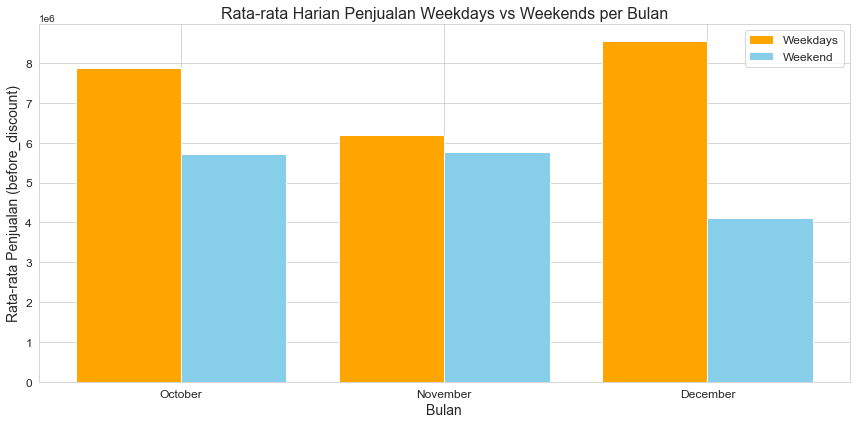

In [ ]:
import seaborn as sns

# Set style seaborn
sns.set_style("whitegrid")

# Reset indeks merged_data
merged_data.reset_index(inplace=True)

# Plot rata-rata harian penjualan weekdays dan weekends per bulan
plt.figure(figsize=(12, 6))

# Plot bar untuk weekdays
plt.bar(merged_data.index - 0.2, merged_data['before_discount_weekdays'], width=0.4, color='orange', label='Weekdays')

# Plot bar untuk weekends
plt.bar(merged_data.index + 0.2, merged_data['before_discount_weekend'], width=0.4, color='skyblue', label='Weekend')

plt.title('Rata-rata Harian Penjualan Weekdays vs Weekends per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Rata-rata Penjualan (before_discount)', fontsize=14)
plt.xticks(merged_data.index, merged_data['month'], fontsize=12)  # Gunakan index dan label bulan
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Tampilkan plot
plt.show()

## `Jawaban No 4.2`

**Rata-rata harian penjualan weekends dan weekdays untuk keseluruhan 3 bulan**

In [ ]:
# Hitung rata-rata harian penjualan weekends dan weekdays untuk keseluruhan 3 bulan
average_sales_weekend_total = round(sales_weekend.before_discount_weekend.mean(), 2)
average_sales_weekdays_total = round(sales_weekdays.before_discount_weekdays.mean(), 2)

# Menggabungkan data weekdays dan weekends
combined_data_average = pd.DataFrame({
    'Weekdays': [average_sales_weekdays_total],
    'Weekend': [average_sales_weekend_total],
    'Difference' : average_sales_weekend_total - average_sales_weekdays_total,
    'Difference (%)' : (average_sales_weekend_total - average_sales_weekdays_total)/average_sales_weekend_total * 100
}).round()

# Ubah nama indeks menjadi 'Average Sales'
combined_data_average.index = ['Average Sales']

# Tampilkan hasil
combined_data_average


,Weekdays,Weekend,Difference,Difference (%)
Average Sales,7520249.0,5269300.0,-2250949.0,-43.0
